In [35]:
import numpy as np
import pandas as pd
#Creating a collaborative filter
ra = pd.read_csv('ratings.csv')
ra

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [3]:
len(ra.index)

100836

In [4]:
mo = pd.read_csv('movies.csv')
mo

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
#join the two tables
movie_data = pd.merge(ra, mo, on='movieId')
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [6]:
#mean film ratings
movie_data.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

In [7]:
#best film rating mean
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

In [8]:
#count rating
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [9]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
ratings_mean_count['rating_counts'] = movie_data.groupby('title')['rating'].count()
ratings_mean_count.sort_values(by=['rating_counts','rating'], ascending=False).head()

,rating,rating_counts
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


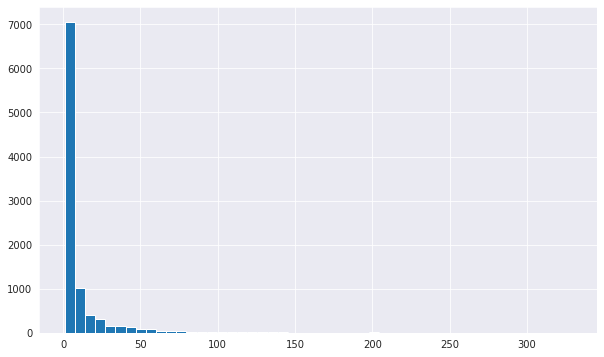

In [10]:
#We display the distribution of the number of ratings.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(10,6))
ratings_mean_count['rating_counts'].hist(bins=50)

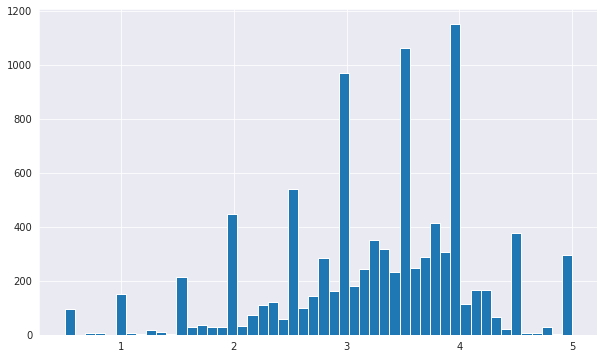

In [11]:
#We display the distribution of average ratings.

plt.figure(figsize=(10,6))
ratings_mean_count['rating'].hist(bins=50)

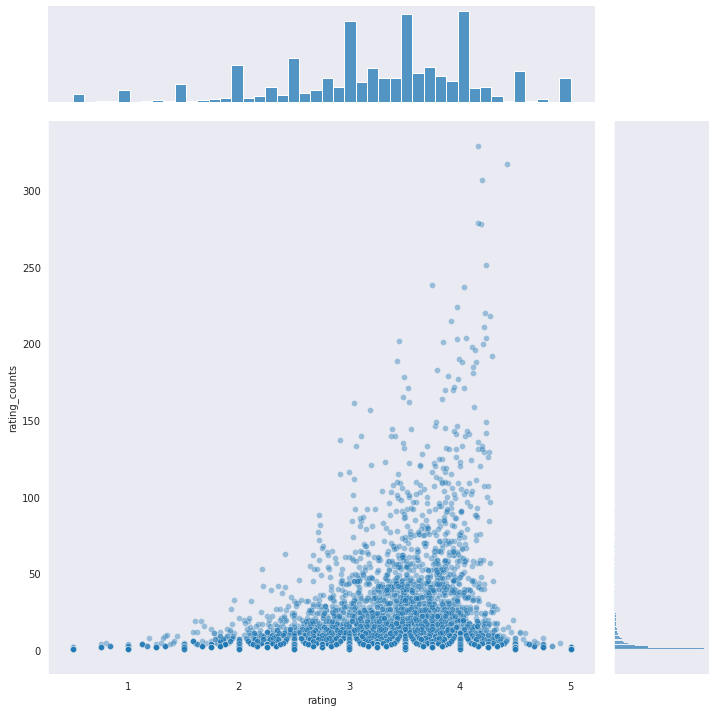

In [12]:
#We display both distributions in the same graph
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, height=10, alpha=0.4)

In [13]:
#Pivot-table
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')
user_movie_rating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#We select all evaluations of the film 'Forrest Gump'.
target_ratings = user_movie_rating['Forrest Gump (1994)']
target_ratings

userId
1      4.0
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    4.0
607    NaN
608    3.0
609    4.0
610    3.0
Name: Forrest Gump (1994), Length: 610, dtype: float64

In [15]:
target_ratings.count()

329

In [16]:
#We calculate its correlation index with all other films using the corrwith method
movies_like_target = user_movie_rating.corrwith(target_ratings)

corr_target = pd.DataFrame(movies_like_target, columns=['Correlation'])
corr_target.dropna(inplace=True)
corr_target.head()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [17]:
#We display films with the highest correlation index.
corr_target.sort_values('Correlation', ascending=False).head(100)

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
...,...
It Might Get Loud (2008),1.0
Black Dynamite (2009),1.0
"Town Called Panic, A (Panique au village) (2009)",1.0


In [18]:
user_movie_rating['Lost & Found (1999)'].count()

2

In [19]:
#We join that table with the number of ratings per film.
corr_target = corr_target.join(ratings_mean_count['rating_counts'])
corr_target.head()

,Correlation,rating_counts
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [20]:
#We now only consider films with at least 50 ratings.
corr_target.query('rating_counts > 50').sort_values('Correlation', ascending=False).head(20)


,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,329
Mr. Holland's Opus (1995),0.652144,80
Pocahontas (1995),0.550118,68
Grumpier Old Men (1995),0.534682,52
Caddyshack (1980),0.520328,52
"Few Good Men, A (1992)",0.517146,57
Field of Dreams (1989),0.503845,56
Big (1988),0.492351,91
Hook (1991),0.484676,53


In [21]:
#Application of KNN, SVD, SlopeOne
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 4.5 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633967 sha256=e2726d4c892332ce007c8e898d045693b7fc8e9d5dee2475b3e55d374c8d9f48
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [22]:
# Load Surprise libraries
from surprise import Dataset
from surprise.reader import Reader

from surprise import accuracy


reader = Reader(rating_scale = (0.5, 5.0))
raset = Dataset.load_from_df(ra[['userId', 'movieId', 'rating']], reader)



In [23]:
type(raset)

surprise.dataset.DatasetAutoFolds

In [24]:
from surprise import KNNBasic
from surprise.model_selection import cross_validate

knn = KNNBasic(verbose=False)
res = cross_validate(knn, raset, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9515  0.9440  0.9429  0.9536  0.9509  0.9486  0.0043  
MAE (testset)     0.7279  0.7247  0.7227  0.7297  0.7283  0.7267  0.0026  
Fit time          0.12    0.19    0.18    0.29    0.31    0.22    0.07    
Test time         1.74    1.73    2.63    3.85    3.53    2.70    0.88    


In [25]:
from surprise import SVD

svd = SVD()
res = cross_validate(svd, raset, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8768  0.8716  0.8733  0.8719  0.8745  0.8736  0.0019  
MAE (testset)     0.6719  0.6713  0.6729  0.6715  0.6708  0.6717  0.0007  
Fit time          7.38    13.01   5.31    5.33    5.29    7.26    2.98    
Test time         0.58    0.15    0.28    0.17    0.29    0.29    0.15    


In [26]:
from surprise import SlopeOne

algo = SlopeOne()
res = cross_validate(algo, raset, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9070  0.8927  0.9091  0.9053  0.8905  0.9009  0.0077  
MAE (testset)     0.6925  0.6832  0.6937  0.6909  0.6816  0.6884  0.0050  
Fit time          7.09    7.52    6.84    7.17    6.58    7.04    0.31    
Test time         7.20    8.08    6.75    8.91    7.28    7.64    0.77    


In [27]:
from collections import defaultdict

def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

In [28]:
from surprise.model_selection import KFold

kf = KFold(n_splits=5)
algo = KNNBasic(verbose=False)

for trainset, testset in kf.split(raset):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions)

print("Precision:", sum(prec for prec in precisions.values()) / len(precisions))
print("Recall:", sum(rec for rec in recalls.values()) / len(recalls))

Precision: 0.784757351027843
Recall: 0.5841041557015425


In [29]:
from surprise.model_selection import KFold

kf = KFold(n_splits=5)
algo = SVD()

for trainset, testset in kf.split(raset):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions)

print("Precision:", sum(prec for prec in precisions.values()) / len(precisions))
print("Recall:", sum(rec for rec in recalls.values()) / len(recalls))

Precision: 0.8086231203007523
Recall: 0.5469449771636127


In [30]:
from surprise.model_selection import KFold

kf = KFold(n_splits=5)
algo = SlopeOne()

for trainset, testset in kf.split(raset):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions)

print("Precision:", sum(prec for prec in precisions.values()) / len(precisions))
print("Recall:", sum(rec for rec in recalls.values()) / len(recalls))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


Precision: 0.7886169659120481
Recall: 0.5295607211387191
